**Hipótesis:** Existen diferencias significativas entre los valores reportados por las fuentes (INDEC, CAC, AFCP) para el mismo índice de tiempo, actividad y unidad de medida

In [0]:
jdbcHostname = "servidor-tif.database.windows.net"
jdbcDatabase = "AzureSqlDatabase1"
jdbcPort = 1433

dbUser = "adminsql"
dbPassword = "*********************"

jdbcUrl = f"jdbc:sqlserver://{jdbcHostname}:{jdbcPort};database={jdbcDatabase}"

df = (spark.read
      .format("jdbc")
      .option("url", jdbcUrl)
      .option("dbtable", "dbo.proyecto_datos")
      .option("user", dbUser)
      .option("password", dbPassword)
      .option("driver", "com.microsoft.sqlserver.jdbc.SQLServerDriver")
      .load())

display(df.limit(5))

sector_id,sector_nombre,variable_id,actividad_producto_nombre,indicador,unidad_de_medida,fuente,frecuencia_nombre,cobertura_nombre,alcance_tipo,alcance_id,alcance_nombre,indice_tiempo,valor
24,Construcci�n,387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-01-01,143.48970592258
24,Construcci�n,387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-02-01,134.90980700102
24,Construcci�n,387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-03-01,144.06030425338
24,Construcci�n,387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-04-01,134.1039395234
24,Construcci�n,387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,Nacional,PAIS,200,Argentina,2012-05-01,142.16740349288


**Importo Librerias**

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, monotonically_increasing_id
from pyspark.sql import functions as F
import seaborn as sns
import matplotlib.pyplot as plt

**Limpieza y transformación**

In [0]:
cols_to_drop = ["sector_id", "sector_nombre", "cobertura_nombre"]
df = df.drop(*[c for c in cols_to_drop if c in df.columns])

# Renombrar columnas
renames = {
    "variable_id": "id_variable",
    "actividad_producto_nombre": "nombre_actividad_producto",
    "frecuencia_nombre": "nombre_frecuencia",
    "alcance_tipo": "tipo_alcance",
    "alcance_id": "id_alcance",
    "alcance_nombre": "nombre_alcance"
}
for old, new in renames.items():
    if old in df.columns:
        df = df.withColumnRenamed(old, new)

# Agregar índice autoincremental
df = df.withColumn("indice", monotonically_increasing_id())

display(df.limit(10)) 

id_variable,nombre_actividad_producto,indicador,unidad_de_medida,fuente,nombre_frecuencia,tipo_alcance,id_alcance,nombre_alcance,indice_tiempo,valor,indice
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-01-01,143.48970592258,0
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-02-01,134.90980700102,1
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-03-01,144.06030425338,2
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-04-01,134.1039395234,3
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-05-01,142.16740349288,4
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-06-01,144.43518754713,5
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-07-01,149.20910429157,6
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-08-01,158.26207275518,7
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-09-01,126.31749118463,8
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-10-01,142.94282815441,9


**Identifico variables cualitativas y cuantitativas**

In [0]:
cualitativas = ["id_variable", "nombre_actividad_producto", "indicador", "unidad_de_medida",
                "fuente", "nombre_frecuencia", "tipo_alcance", "id_alcance", "nombre_alcance", "indice_tiempo"]
cualitativas = [c for c in cualitativas if c in df.columns]
cuantitativas = ["valor"]

print("Cualitativas:", cualitativas)
print("Cuantitativas:", cuantitativas)

Cualitativas: ['id_variable', 'nombre_actividad_producto', 'indicador', 'unidad_de_medida', 'fuente', 'nombre_frecuencia', 'tipo_alcance', 'id_alcance', 'nombre_alcance', 'indice_tiempo']
Cuantitativas: ['valor']


**Manejo de nulos y tipos**

In [0]:
if 'valor' in df.columns:
    df = df.withColumn("valor", col("valor").cast("double"))

df = df.na.drop(subset=["valor"])
display(df.limit(10))

id_variable,nombre_actividad_producto,indicador,unidad_de_medida,fuente,nombre_frecuencia,tipo_alcance,id_alcance,nombre_alcance,indice_tiempo,valor,indice
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-01-01,143.48970592258,0
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-02-01,134.90980700102,1
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-03-01,144.06030425338,2
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-04-01,134.1039395234,3
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-05-01,142.16740349288,4
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-06-01,144.43518754713,5
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-07-01,149.20910429157,6
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-08-01,158.26207275518,7
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-09-01,126.31749118463,8
387,Art�culos sanitarios de cer�mica,ISAC_desestacionalizada,�ndice base 2004=100,INDEC,Mensual,PAIS,200,Argentina,2012-10-01,142.94282815441,9


**Pivot: cada fuente como columna**

In [0]:
pivot_df = (df.groupBy("indice_tiempo", "nombre_actividad_producto", "unidad_de_medida")
              .pivot("fuente")
              .agg(F.avg("valor")))

**Calcular matriz de correlación**

In [0]:
cols_fuentes = [c for c in ["INDEC", "CAC", "AFCP"] if c in pivot_df.columns]

corr_matrix = pivot_df.select([F.col(c).cast("double") for c in cols_fuentes]).toPandas().corr()

print("Matriz de correlación:")
display(corr_matrix)

Matriz de correlación:


INDEC,CAC,AFCP
1.0,null,null
null,1.0,null
null,null,1.0


**Visualización Heatmap**

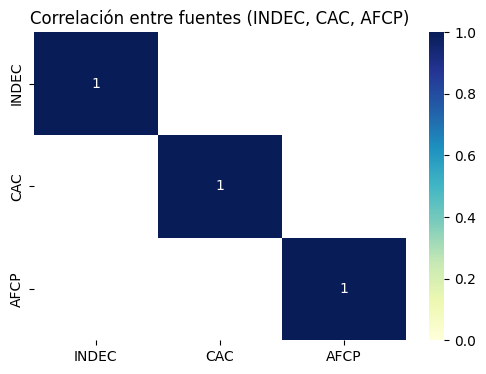

In [0]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", vmin=0, vmax=1)
plt.title("Correlación entre fuentes (INDEC, CAC, AFCP)")
plt.show()

Los valores null en la matriz indican que no había registros coincidentes entre todas las fuentes (INDEC, CAC, AFCP) en algunas combinaciones de indice_tiempo, actividad o unidad_de_medida.

El heatmap muestra una **correlación negativa o débil** entre fuentes: significa que los datos de cada fuente no siguen la misma tendencia quizás por diferencias metodológicas o cobertura.